# Safety
When looking to move into a new neighborhood or city, the most important piece of information to check is the violence rate of the area, To get an understanding of the community. When determining the best neighborhood in Pittsburgh one of the most important metrics is safety.  Without safety in a community can it really be considered the best? When first determining what data set would effectivly portray saftey in a community arrest were the first thing that came to mind, But when diving deeper into the arrest data set there were many cases where a non-violent crime was committed.To find the best data set for this safety I had to dig a little deaper than just looking for arrest data sets.

## Non-Traffic Citations
The metric of Non-Traffic Citations is a great data set to showcase what type of community these neighborhoods have along with how safe they are. This data set does not only give you a perspective on how safe you will be in the area, but the type of people you will be surrounded by. Some examples of Non-Traffic Citations are Disorderly Conduct, Public drunkenness, and possession of marajuana. When looking for a neighborhood to live in, do you really want to be surrounded by a community where a there is a significate number of citations?



In [24]:
import pandas as pd

# read in the data sets
data = pd.read_csv('Dataset.csv')
Pdata = pd.read_csv('PopulationData.csv')

# Extracting the the number of neighborhoods. Adds the index value in the output.
neighborhoodCount = data['NEIGHBORHOOD'].value_counts()
neighborhoodCountDf = neighborhoodCount.reset_index()

# For the population data I had the rename the column so both data sets would aline with the neighborhood column.
Pdata.rename(columns={'Neighborhood': 'NEIGHBORHOOD'}, inplace=True)

# Filters out the columns that we do not want, keeping the ones in the brackets.
neighborhoodCountDf.columns = ['NEIGHBORHOOD', 'citationCount']
Pdata = Pdata[['NEIGHBORHOOD', '2020_Total_Population']]

# Merging the two data sets together with the NEIGHBORHOOD column as they colorlate with one another.
# Allowing the Neighborhood, CitationCount, and total population to aline with one another.
mergedData = neighborhoodCountDf.reset_index().merge(Pdata, how='left',on='NEIGHBORHOOD')



# This line of code displays all of the data I have extracted from the data set from highest citations to lowest. 
# Alongside there population count.
pd.set_option('display.max_rows', None)

# Extracting the top 5 lowest Citation to population ratio out of all the neighborhoods.
# Then dividing the Total Population with the citation count for the neighborhood.
mergedData['CitationPerPop'] = mergedData['citationCount'] / mergedData['2020_Total_Population']

mergedData['CitationPerPop'] = mergedData['CitationPerPop'] * 500

mergedData['CitationPerPop'] = 100 - mergedData['CitationPerPop']

mergedData['CitationPerPop'] = (mergedData['CitationPerPop'] / 2.5) 

rankings = mergedData.nlargest(80, 'CitationPerPop')
print(rankings)





    index              NEIGHBORHOOD  citationCount  2020_Total_Population  \
89     89            Swisshelm Park              6                 1339.0   
94     94            Chartiers City              3                  492.0   
69     69           Stanton Heights             28                 4427.0   
88     88               Summer Hill              7                  998.0   
73     73               Morningside             24                 3252.0   
52     52             Highland Park             51                 6235.0   
77     77                Friendship             17                 1963.0   
85     85             New Homestead              8                  917.0   
75     75          Duquesne Heights             21                 2397.0   
82     82             Regent Square              9                  971.0   
58     58                Banksville             39                 4127.0   
51     51              Point Breeze             51                 5348.0   

### Rankings

When ranking the neighborhoods, It was not fair to the bigger neighborhoods. Because of this I added a population data set. Adding this dad set ensures that all neighborhoods are fairly ranked. For this metric rankings will be determined directly from the Citation Count and population of the Neighborhood. For this I simply divided the citation count by the total population. I used the soulution for this equation to determine rankings. To give you an example of how I scored them, Swisshelm Park had the lowest Citation count to population for all of the nighborhoods, which was 0.00448. I initally scored it out of 100 and subtracted CitationPerPop multiplyed by 500. Giving Swisshelm Park a 97.75/100. After finding the score out of 100, I then simplifyed the fraction to 39.10/40.

### Top 5

#### 1 Swisshelm Park 39.10/40

#### 2 Chartiers City 38.78/40

#### 3 Stanton Heights 38.73/40

#### 4 Summer Hills 38.59/40

#### 5 Morningside 38.52/40

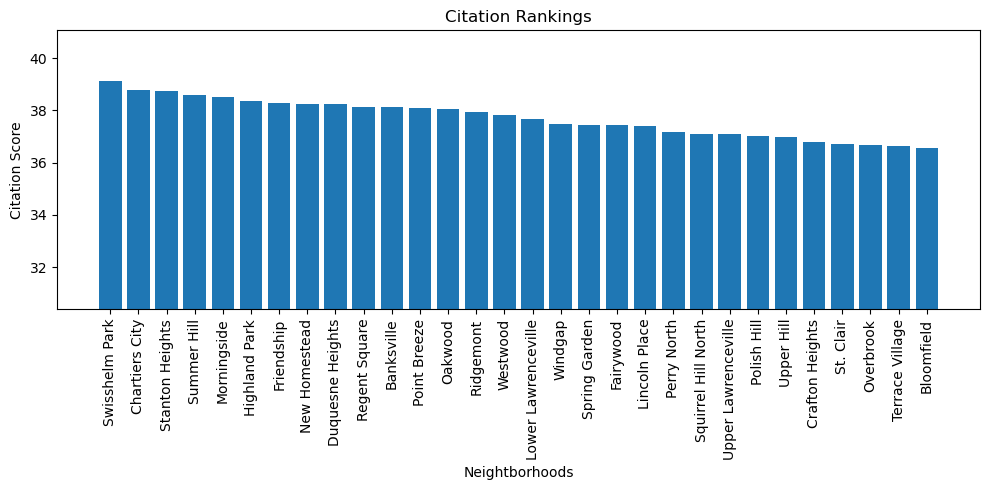

In [40]:
import matplotlib.pyplot as plt

# Collecting the top 30 largest rankings
top30 = mergedData.nlargest(30, 'CitationPerPop')

plt.figure(figsize=(10, 5))

#Creating the graph
plt.bar(top30['NEIGHBORHOOD'], top30['CitationPerPop'])

#Rotating the names so they are readable
plt.xticks(rotation=90)

plt.title('Citation Rankings')
plt.xlabel('Neightborhoods')
plt.ylabel('Citation Score')

#Zooming in on the 30-40 range
plt.ylim(30.40)
plt.tight_layout()
plt.show()